In [1]:
%matplotlib notebook

from scipy.io import loadmat

 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

mat = loadmat("Project Datasets/ChemTrainNew.mat")

# X and y correspond to a training set that your model will learn on.
Xtrain = mat["XtrainDS"]
ytrain = mat["YtrainDS"]

print('shape of XtrainDS', Xtrain.shape)
print('shape of YtrainDS', ytrain.shape)

print("Xtrain")
print(Xtrain[:5,:5])

# excluding the first column which is time
Xtrain = Xtrain[:, 1:65]

print('shape of XtrainDS', Xtrain.shape)

print("Xtrain")
print(Xtrain[:3,:3])
print("ytrain")
print(ytrain[:5])


shape of XtrainDS (4466, 65)
shape of YtrainDS (4466, 1)
Xtrain
[[7.29562424e+05 1.12845000e+03 7.96250000e+01 3.91725000e+02
  4.60250000e+01]
 [7.29562590e+05 1.12845000e+03 8.04250000e+01 3.93525000e+02
  4.58500000e+01]
 [7.29562611e+05 1.12845000e+03 8.02000000e+01 3.91500000e+02
  4.64000000e+01]
 [7.29562715e+05 1.12820000e+03 8.00250000e+01 3.96000000e+02
  4.70000000e+01]
 [7.29563340e+05 1.12820000e+03 8.06250000e+01 3.96112500e+02
  4.63500000e+01]]
shape of XtrainDS (4466, 64)
Xtrain
[[1128.45    79.625  391.725]
 [1128.45    80.425  393.525]
 [1128.45    80.2    391.5  ]]
ytrain
[[14.675]
 [18.65 ]
 [18.   ]
 [14.65 ]
 [24.225]]


In [2]:
# Standardizing the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(Xtrain)

# Apply transform to both the training set and the validation set.
Xtrain = scaler.transform(Xtrain)

print("Xtrain after normalization")
print(Xtrain[:5,:5])

Xtrain after normalization
[[ 0.2634321   0.2928604   0.49939051 -0.3654252  -0.69795398]
 [ 0.2634321   0.45244671  0.53251027 -0.38391001 -0.81328152]
 [ 0.2634321   0.40756306  0.49525054 -0.32581491 -0.74588231]
 [ 0.23279903  0.37265355  0.57804993 -0.26243844 -0.69495846]
 [ 0.23279903  0.49234328  0.58011991 -0.33109628 -0.76085991]]


original shape:    (4466, 64)
transformed shape: (4466, 2)
Variance ratio corresponds to the data with PCA:
[0.35441177 0.10266607]


<IPython.core.display.Javascript object>


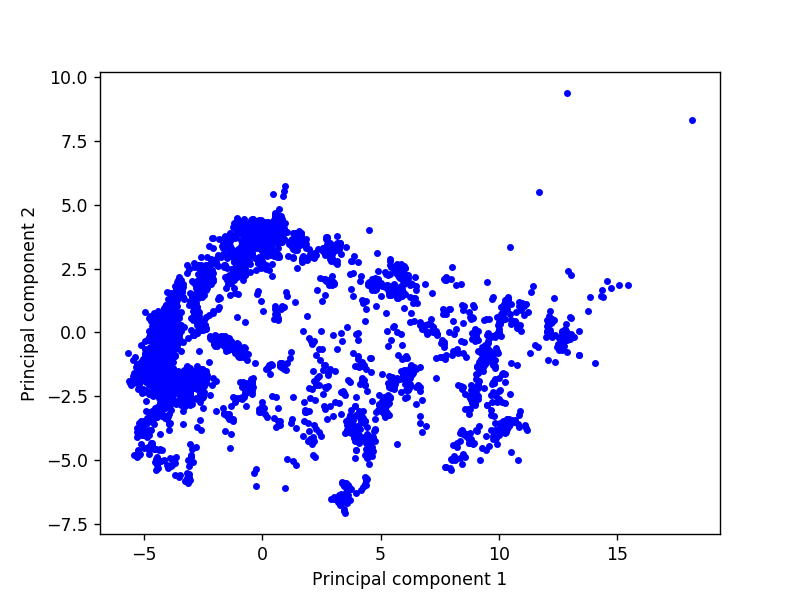

end


In [3]:
# using PCA for Data Visualization
from sklearn.decomposition import PCA

pca_plot =PCA(n_components=2)

pca_plot.fit(Xtrain)

Xtrain_pca_plot = pca_plot.transform(Xtrain)

print("original shape:   ", Xtrain.shape)
print("transformed shape:", Xtrain_pca_plot.shape)

print('Variance ratio corresponds to the data with PCA:')
print(pca_plot.explained_variance_ratio_)

fig, ax = plt.subplots()
ax.scatter(Xtrain_pca_plot[:, 0], Xtrain_pca_plot[:, 1], color="blue", marker=".")
ax.set_xlabel("Principal component 1")
ax.set_ylabel("Principal component 2")
print("end")


In [4]:
# using PCA for Training the model
from sklearn.decomposition import PCA

print("original shape:", Xtrain.shape)

pca =PCA(n_components=10)

pca.fit(Xtrain)

Xtrain_pca = pca.transform(Xtrain)

print("transformed shape:", Xtrain_pca.shape)

print('Variance retained corresponds to the data after reducing with PCA:')
print(pca.explained_variance_ratio_.sum())


original shape: (4466, 64)
transformed shape: (4466, 10)
Variance retained corresponds to the data after reducing with PCA:
0.7681580033565217


In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# X and y data as traing and test set 

Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain_pca, ytrain, test_size=0.2, random_state=0)

print('shapes of training and validation data after splitiing',Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

# using KNN Regression from sklearn

# Create KNN regression object
regression_model = KNeighborsRegressor()

# Train the model using the training sets
regression_model.fit(Xtrain, ytrain)

# Make predictions using the testing set
ypred = regression_model.predict(Xtest)

print("ytest\n",ytest[:5])
print("ypred\n",ypred[:5])



shapes of training and validation data after splitiing (3572, 10) (894, 10) (3572, 1) (894, 1)
ytest
 [[ 5.775]
 [68.05 ]
 [73.625]
 [70.1  ]
 [68.775]]
ypred
 [[43.335]
 [68.005]
 [71.645]
 [70.785]
 [69.135]]


In [6]:
print(Xtrain.shape) 
print(ytrain.shape) 
print(Xtest.shape)  
print(ytest.shape) 
print(ypred.shape)

(3572, 10)
(3572, 1)
(894, 10)
(894, 1)
(894, 1)


In [7]:
#Calculating the errors
from sklearn import metrics
print("mean_squared_error:",metrics.mean_squared_error(ytest,ypred))
print("mean_absolute_error:",metrics.mean_absolute_error(ytest,ypred))
print("root_mean_squared_error:",np.sqrt(metrics.mean_squared_error(ytest,ypred)))


mean_squared_error: 15.725131739373602
mean_absolute_error: 1.7422315436241609
root_mean_squared_error: 3.9654926225342546


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Hyper Parameters Set
n_neighbors = list(range(1,30))
params = {'n_neighbors':n_neighbors, 'weights':['uniform', 'distance'],}

#Making models with hyper parameters sets
model = GridSearchCV(regression_model, param_grid=params, cv=10)

#Learning
model.fit(Xtrain,ytrain)

#The best hyper parameters set
print("Best Hyper Parameters with GridSearchCV:\n",model.best_params_)

#Prediction
ypred=model.predict(Xtest)
print(ytest[:5])
print(ypred[:5])

# Using Cross Validation To Evaluate Model
CV_Result = cross_val_score(model, Xtrain, ytrain, cv=10, n_jobs=-1)
print(); print('cross_val_Result:',CV_Result)
print(); print('cross_val_Mean:', CV_Result.mean())
print(); print('cross_val_Std:', CV_Result.std())

Best Hyper Parameters with GridSearchCV:
 {'n_neighbors': 2, 'weights': 'distance'}
[[ 5.775]
 [68.05 ]
 [73.625]
 [70.1  ]
 [68.775]]
[[40.64900371]
 [67.55938177]
 [73.54699159]
 [71.06981837]
 [69.13127072]]

cross_val_Result: [0.93037945 0.94360392 0.97738679 0.90718279 0.84229223 0.9423587
 0.93862418 0.96180882 0.90967974 0.95405992]

cross_val_Mean: 0.9307376542388427

cross_val_Std: 0.035873755688706106


Cross Validation:
cv_scores:
 {1: 3.482519803349289, 2: 3.3021298348600716, 3: 3.4973533519506725, 4: 3.6917688416214376, 5: 3.9528103895484854, 6: 4.077588374788054, 7: 4.209401908179933, 8: 4.3159964409126195, 9: 4.445355660441528, 10: 4.590440581464301, 11: 4.721668571587634, 12: 4.817574311141019, 13: 4.927730309874994, 14: 5.022481123144474, 15: 5.125763692980042, 16: 5.222379209066494, 17: 5.296542800684945, 18: 5.381433474185421, 19: 5.452272674636083, 20: 5.515462298610366, 21: 5.587068011396259, 22: 5.6513822970928285, 23: 5.711854682674472, 24: 5.758072278914964, 25: 5.81823358826157, 26: 5.8720617068099585, 27: 5.915732199767589, 28: 5.956065699765334, 29: 6.005352404044973}

The best K value is  2  and the error  is  3.3021298348600716


<IPython.core.display.Javascript object>


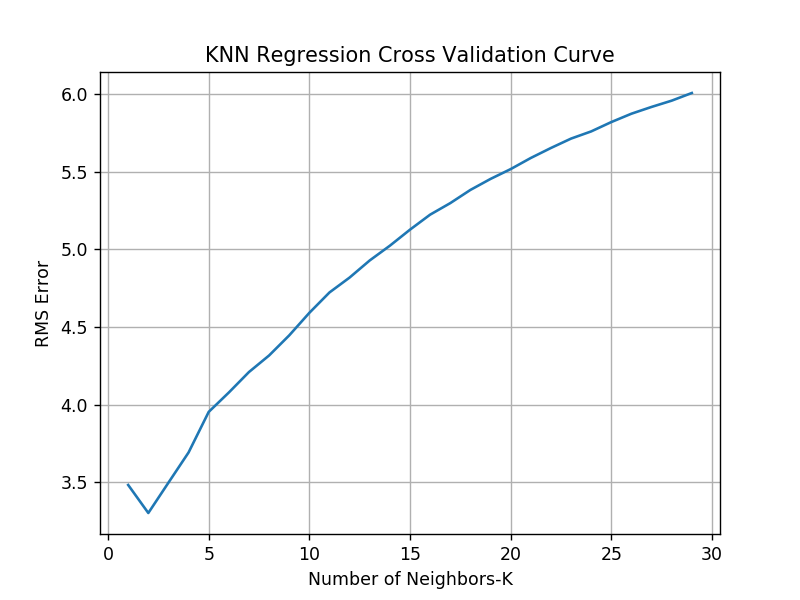

In [9]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from math import sqrt

print ("Cross Validation:")
k_values = list(range(1,30))
cv_scores ={}

# perform 10-fold cross validation
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(knn, Xtrain, ytrain, cv=10, scoring='neg_mean_squared_error')
    rmse= np.sqrt(abs(scores))
    cv_scores.update({k:(rmse.mean())})
print ("cv_scores:\n", cv_scores)

for i,j in cv_scores.items():
    if j==min(cv_scores.values()):
        print ("\nThe best K value is ",i," and the error  is ",j)

# plot
fig, ax = plt.subplots()

# plot the "K" vs "RMSE"
ax.plot(list(cv_scores.keys()), list(cv_scores.values()))

ax.set_xlabel("Number of Neighbors-K")
ax.set_ylabel("RMS Error")
ax.set_title("KNN Regression Cross Validation Curve")
ax.grid()
fig.show()

In [10]:
# Training KNN Regression with the best hyper parameters found through cross-validation
regression_best_KNN = KNeighborsRegressor(n_neighbors=2,weights='distance')

regression_best_KNN.fit(Xtrain,ytrain)

#Prediction
ypred=regression_best_KNN.predict(Xtest)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# calculate mean_squared_error
mean = mean_squared_error(ytest,ypred)
print("mean_squared_error:",format(mean))
# calculate mean_absolute_error
absolute = mean_absolute_error(ytest,ypred)
print("mean_absolute_error:",format(absolute))
rmse = np.sqrt(mean_squared_error(ytest,ypred))
print("root_mean_sqrt_error:",format(rmse))

mean_squared_error: 10.62990655245295
mean_absolute_error: 1.265768582483545
root_mean_sqrt_error: 3.2603537465209125


In [11]:
# using the test data (2971x64)Xtest correspond to a test set.
XtestSep = mat["XtestDS"]
print("Xtest shape",XtestSep.shape)
XtestSep = XtestSep[:, 1:65]
print("Xtest shape after reshape",XtestSep.shape)
print(XtestSep[:5,:5])

from sklearn.decomposition import PCA
XtestSep = scaler.transform(XtestSep)
pca =PCA(n_components=10)
pca.fit(XtestSep)
Xtest_pca=pca.transform(XtestSep)
print("Xtest shape after PCA:", Xtest_pca.shape)

print('Variance retained corresponds to the test data after reducing with PCA:')
print(pca.explained_variance_ratio_.cumsum())

#Prediction of test data with the best Ridge Regression parameters
ytestDS=regression_best_KNN.predict(Xtest_pca)
print("Final output of the test data (XtestDS):")
print(ytestDS[:5])

Xtest shape (2971, 65)
Xtest shape after reshape (2971, 64)
[[1129.75     81.      391.1625   54.025  2319.    ]
 [1129.65     81.525   397.35     53.675  2316.75  ]
 [1129.65     81.525   398.25     54.1    2298.    ]
 [1129.15     81.425   393.8625   53.2    2289.75  ]
 [1128.85     81.25    388.575    53.6    2299.5   ]]
Xtest shape after PCA: (2971, 10)
Variance retained corresponds to the test data after reducing with PCA:
[0.29297227 0.42055283 0.51912732 0.60570668 0.67087021 0.71356248
 0.75152766 0.78302732 0.81040673 0.8308841 ]
Final output of the test data (XtestDS):
[[47.22183915]
 [47.24740178]
 [46.62431755]
 [56.29654798]
 [56.29826525]]


In [12]:
from sklearn import svm
from sklearn.metrics import mean_squared_error

# using SVR Regression from sklearn

# Create SVR regression object
regression_model = svm.SVR(kernel='rbf')

# Train the model using the training sets
regression_model.fit(Xtrain, ytrain.ravel())

# Make predictions using the testing set
ypred = regression_model.predict(Xtest)

print("ytest\n",ytest[:5])
print("ypred\n",ypred[:5])

ytest
 [[ 5.775]
 [68.05 ]
 [73.625]
 [70.1  ]
 [68.775]]
ypred
 [47.6562978  67.89273826 63.76216395 71.04029118 66.79754981]


In [13]:
print(Xtrain.shape) 
print(ytrain.shape) 
print(Xtest.shape)  
print(ytest.shape) 
print(ypred.shape)

(3572, 10)
(3572, 1)
(894, 10)
(894, 1)
(894,)


In [14]:
#Calculating the errors
from sklearn import metrics
print("mean_squared_error:",metrics.mean_squared_error(ytest,ypred))
print("mean_absolute_error:",metrics.mean_absolute_error(ytest,ypred))
print("root_mean_squared_error:",np.sqrt(metrics.mean_squared_error(ytest,ypred)))


mean_squared_error: 62.29171468229821
mean_absolute_error: 4.158950060658959
root_mean_squared_error: 7.892510036882957


In [15]:
from sklearn.model_selection import GridSearchCV

#Hyper Parameters Set
n_neighbors = list(range(1,30))
parameters = {'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}

#Making models with hyper parameters sets
model = GridSearchCV(regression_model, param_grid=parameters, cv=10)

#Learning
model.fit(Xtrain,ytrain.ravel())

#The best hyper parameters set
print("Best Hyper Parameters with GridSearchCV:\n",model.best_params_)

#Prediction
ypred=model.predict(Xtest)
print(ytest[:5])
print(ypred[:5])

# Using Cross Validation To Evaluate Model
CV_Result = cross_val_score(model, Xtrain, ytrain, cv=10, n_jobs=-1)
print(); print('cross_val_Result:',CV_Result)
print(); print('cross_val_Mean:', CV_Result.mean())
print(); print('cross_val_Std:', CV_Result.std())

Best Hyper Parameters with GridSearchCV:
 {'C': 10, 'epsilon': 0.5, 'gamma': 0.0001}
[[ 5.775]
 [68.05 ]
 [73.625]
 [70.1  ]
 [68.775]]
[56.07236894 63.25897648 59.75037762 74.36093215 62.43305431]

cross_val_Result: [0.43624123 0.35150752 0.3660487  0.33238344 0.39898819 0.37991201
 0.41957397 0.32235914 0.36467817 0.40209957]

cross_val_Mean: 0.3773791934513451

cross_val_Std: 0.035128995859431855


In [16]:
# Training SVR Regression with the best hyper parameters found through cross-validation
regression_best_SVR = svm.SVR(kernel='rbf', C=10, gamma=0.0001, epsilon=0.5)

regression_best_SVR.fit(Xtrain,ytrain.ravel())

#Prediction
ypred=regression_best_SVR.predict(Xtest)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# calculate mean_squared_error
mean = mean_squared_error(ytest,ypred)
print("mean_squared_error:",format(mean))
# calculate mean_absolute_error
absolute = mean_absolute_error(ytest,ypred)
print("mean_absolute_error:",format(absolute))
rmse = np.sqrt(mean_squared_error(ytest,ypred))
print("root_mean_sqrt_error:",format(rmse))

mean_squared_error: 98.70089946808297
mean_absolute_error: 6.402063847932965
root_mean_sqrt_error: 9.934832634125396


In [17]:
# using the test data (2971x64)Xtest correspond to a test set.
XtestSep = mat["XtestDS"]
print("Xtest shape",XtestSep.shape)
XtestSep = XtestSep[:, 1:65]
print("Xtest shape after reshape",XtestSep.shape)
print(XtestSep[:5,:5])

from sklearn.decomposition import PCA
XtestSep = scaler.transform(XtestSep)
pca =PCA(n_components=10)
pca.fit(XtestSep)
Xtest_pca=pca.transform(XtestSep)
print("Xtest shape after PCA:", Xtest_pca.shape)

print('Variance retained corresponds to the test data after reducing with PCA:')
print(pca.explained_variance_ratio_.cumsum())

#Prediction of test data with the best Ridge Regression parameters
ytestDS=regression_best_SVR.predict(Xtest_pca)
print("Final output of the test data (XtestDS):")
print(ytestDS[:5])

Xtest shape (2971, 65)
Xtest shape after reshape (2971, 64)
[[1129.75     81.      391.1625   54.025  2319.    ]
 [1129.65     81.525   397.35     53.675  2316.75  ]
 [1129.65     81.525   398.25     54.1    2298.    ]
 [1129.15     81.425   393.8625   53.2    2289.75  ]
 [1128.85     81.25    388.575    53.6    2299.5   ]]
Xtest shape after PCA: (2971, 10)
Variance retained corresponds to the test data after reducing with PCA:
[0.29297227 0.42055283 0.51912732 0.60570668 0.67087021 0.71356249
 0.75152766 0.78302732 0.81040674 0.83088528]
Final output of the test data (XtestDS):
[56.41969117 56.30702128 56.37094122 57.76392969 57.32875861]


In [18]:
Final_Output = regression_best_KNN.predict(Xtest_pca)
print(Final_Output)

[[47.22171741]
 [47.24724683]
 [46.62327154]
 ...
 [64.97208349]
 [64.97523893]
 [64.97347461]]
